## IMPORT LIBRARIES 

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math as math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.tree import export_graphviz
from os import system
from IPython.display import Image
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
%matplotlib inline
sns.set(color_codes=True)

## IMPORT DATASET

In [4]:
import pandas as pd
dataset = pd.read_csv("parkinsons.csv")

In [5]:
dataset.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [7]:
shape_data=dataset.shape
print('The shape of the dataframe is',shape_data,'which means there are',shape_data[0],'rows of voice recordings and',shape_data[1],'attributes of patients.')

The shape of the dataframe is (195, 24) which means there are 195 rows of voice recordings and 24 attributes of patients.


In [8]:
dataset.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


## EXPLORATORY DATA ANALYSIS (EDA)

### HEAT MAP

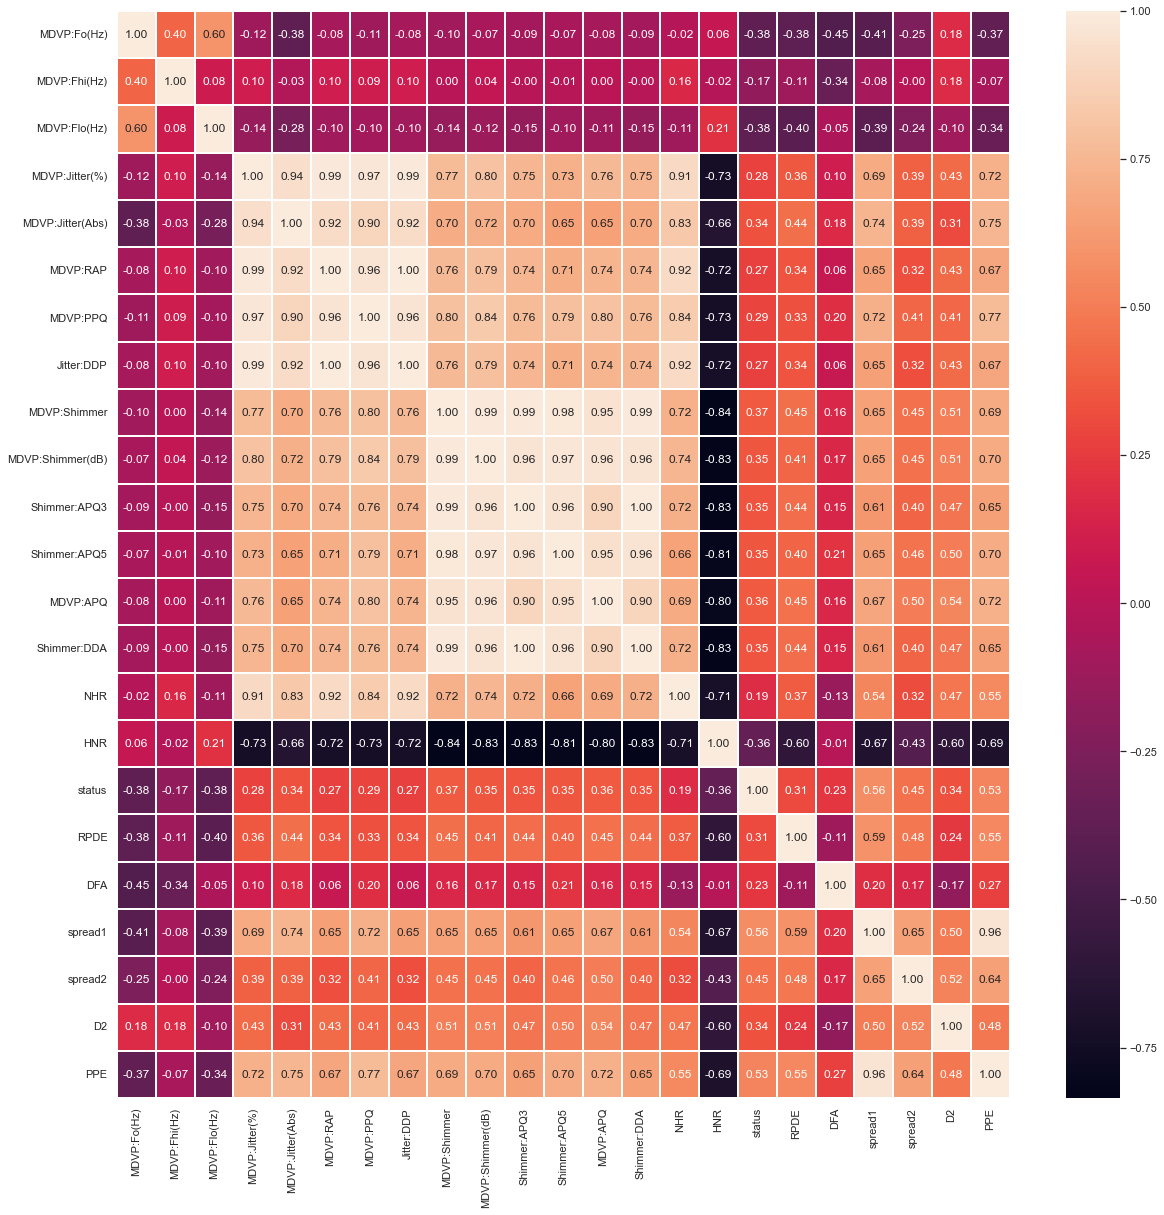

In [9]:
usecols =[i for i in dataset.columns if i != ['name','status']]
corr=dataset[usecols].corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr,annot=True,linewidth=0.05,ax=ax, fmt= '.2f');


## DATA PREPROCESSING 

### 1.Checking Null or Empty Values (Data Cleaning) :

In [10]:
# Checking null value sum
dataset.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

We dont have any null values so now we can safely go ahead...

### 2. Label Encoder/One Hot Encoder :

Encoding the Categorical values into numerical values is not required in this dataset. Because all values we have floating type only. we have name column as a categorical values but we are not going to use that column in model prediction. So no need to apply label encoding...

### 3. Handle Outliers :

We didn't find any outliers in our dataset so we can safely go ahead.

### 4. MultiCollinearity:

There seems to exist high correlation between multiple independent attributes. This might be a problem since, we would not be able to distinguish between the individual effects of the independent attributes on the dependent attribute. We'll try to identify the multi-collinearity by leveraging VIF (Variable Inflation Factor) and if it is found to be high then we will attempt at reducing the multi-collinearity by deleting few attributes with high VIF.


In [11]:

#Dropping the column Name
udata=dataset.drop('name',axis=1)
udata.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


Checking and removing multi-collinearity:

In this step we will check the multicollinearity by computing VIF (Variable Inflation Factors) score; VIF score of an independent variable represents how well the variable is explained by other independent variables.

MultiCollinearity: 

Multicolinearity exists when there is high correlation between multiple independent variables. This might be a problem since, we would not be able to distinguish between the individual effects of the independent variables on the dependent variable. We'll try to identify the multi-collinearity by leveraging VIF (Variable Inflation Factor) and if it is found to be high then we will attempt at reducing the multi-collinearity by deleting few variables with high VIF.

In [12]:
# lets make a copy of the data
pdata=udata.copy()

In [13]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)
calc_vif(round(pdata,2))

C:\Users\Harshita_harshu___\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,MDVP:Fo(Hz),53.518297
1,MDVP:Fhi(Hz),8.795329
2,MDVP:Flo(Hz),17.257065
3,MDVP:Jitter(%),7.607233
4,MDVP:Jitter(Abs),NaN
5,MDVP:RAP,6.262228
6,MDVP:PPQ,6.428414
7,Jitter:DDP,17.730525
8,MDVP:Shimmer,127.969986
9,MDVP:Shimmer(dB),179.950644


Observation:

1.From the VIF scores computed above, it clearly appears that dataset has high multicollinearity.

2.As discussed above, multicollinearity occurs when two or more independent variables are highly correlated with one another; which means that an independent variable can be predicted from another independent variable. Hence, we would not be able to distinguish between the individual effects of the independent variables on the dependent variable.

3.It is important to reduce the multicollinearity; else our model might give biased outputs.

4.We will follow the approach of deleting one attribute at a time and checking the VIF of the remaining attributes. We will continue to delete one attribute and check VIF of remaining till VIF of remaining attributes is less than 10

In [14]:
# The attribute with the highest VIF is DFA. Dropping DFA from the dataset. 
# We also noticed that VIF of MDVP:Jitter(Abs) is Not a number. Hence, we will drop MDVP:Jitter(Abs) as well.
# We will also drop Status; since it is a target variable
pdata=pdata.drop(['DFA','MDVP:Jitter(Abs)','status'],axis=1)

# Computing VIF of remaining attributes
calc_vif(round(pdata,2))

,variables,VIF
0,MDVP:Fo(Hz),43.626409
1,MDVP:Fhi(Hz),8.414154
2,MDVP:Flo(Hz),16.429654
3,MDVP:Jitter(%),7.287722
4,MDVP:RAP,6.188621
5,MDVP:PPQ,6.264600
6,Jitter:DDP,17.151583
7,MDVP:Shimmer,127.960825
8,MDVP:Shimmer(dB),176.304571
9,Shimmer:APQ3,50.830237


In [15]:
# It is clearly noticable that VIF of other variable has decreased when we dropped DFA from the data set.
# We will continue to delete one attribute at a time and check till the VIF of the remaining attributes is below 10; 
# And we will select the attribute with highest VIF for deletion.

pdata=pdata.drop(['MDVP:Shimmer(dB)','spread1','MDVP:Shimmer','D2','Shimmer:DDA','RPDE','Shimmer:APQ5','MDVP:Fo(Hz)',
                  'PPE','HNR','Shimmer:APQ3','Jitter:DDP'],axis=1)

# Computing VIF of remaining attributes
calc_vif(round(pdata,2))

,variables,VIF
0,MDVP:Fhi(Hz),5.269247
1,MDVP:Flo(Hz),5.313824
2,MDVP:Jitter(%),4.680998
3,MDVP:RAP,4.362311
4,MDVP:PPQ,3.948684
5,MDVP:APQ,7.240203
6,NHR,5.278017
7,spread2,8.244022


## FEATURE SPLIT

Split the data into training and test set in the ratio of 70:30 respectively

In [16]:
# lets build our classification model
# independent variables
X = pdata

# X=pd.DataFrame(X_stand1)
# the dependent variable
y = udata['status']

In [17]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [18]:
# lets check split of data
print("{0:0.2f}% data is in training set".format((len(X_train)/len(pdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(pdata.index)) * 100))

69.74% data is in training set
30.26% data is in test set


In [19]:
y_train_yPD=y_train[y_train==1].count()
y_train_nPD=y_train[y_train==0].count()
y_test_yPD=y_test[y_test==1].count()
y_test_nPD=y_test[y_test==0].count()

print("In the original dataset people who had parkinson Dieases    : {0} ({1:0.2f}%)".format(len(pdata.loc[udata['status'] == 1]), (len(pdata.loc[udata['status'] == 1])/len(pdata.index)) * 100))
print("In the original dataset people who didnot have Parkinson Disease   : {0} ({1:0.2f}%)".format(len(pdata.loc[udata['status'] == 0]), (len(pdata.loc[udata['status'] == 0])/len(pdata.index)) * 100))
print("")
print("In the training dataset people who who had parkinson Dieases    : {0} ({1:0.2f}%)".format(y_train_yPD, (y_train_yPD/len(y_train))*100))
print("In the training dataset people who didnot have Parkinson Disease    : {0} ({1:0.2f}%)".format(y_train_nPD, (y_train_nPD/len(y_train))*100))
print("")
print("In the test dataset people who who had parkinson Dieases    : {0} ({1:0.2f}%)".format(y_test_yPD, (y_test_yPD/len(y_test))*100))
print("In the test dataset people who didnot have Parkinson Disease    : {0} ({1:0.2f}%)".format(y_test_nPD, (y_test_nPD/len(y_test))*100))


In the original dataset people who had parkinson Dieases    : 147 (75.38%)
In the original dataset people who didnot have Parkinson Disease   : 48 (24.62%)

In the training dataset people who who had parkinson Dieases    : 107 (78.68%)
In the training dataset people who didnot have Parkinson Disease    : 29 (21.32%)

In the test dataset people who who had parkinson Dieases    : 40 (67.80%)
In the test dataset people who didnot have Parkinson Disease    : 19 (32.20%)


## SCALING OF DATA 

From the dataset it is quite evident that different independent variables have different scales e.g: DB, %age, Hz etc. Now, Machine learning algorithms dont recognize the unit of data; Hence, it won't be prudent to compare DB with a %age or %age with Hz. Higher ranging numbers in one of the attributes will have superiority. 10 DB and 10% means different but machine learning algorithm understand both to be the same.

Scales impacts:

Gradient descent based algorithms like Linear Regression, Logistics Regression
Distance based algorithms like KNN, K-means and SVM

Scales dont impact:

Tree based algorithms like Decision trees

In [20]:
# lets create a copy of the train and test data for scaling
X_Train_stand = X_train.copy()
X_Test_stand = X_test.copy()

# we will use standard scaler for scaling the data.
scale = StandardScaler().fit(X_Train_stand)
X_train= scale.transform(X_Train_stand)

X_test= scale.transform(X_Test_stand)

## MODELLING ( TRAINING )

We will train the following classification algorithms:

1.Logistic Regression

2.KNN

3.Naive Bayes

4.SVM

Post training the model, in addition to the accuracy; we will also compute

1.Confusion Matrix

2.Classification Report

For the provided dataset, accuracy might not be the only most important score; but recall (which is out of all subjects who had Parkinson Disease, how many actually had the disease) is the most important score; since our aim should be to identify as much subjects with disease as possible.

The following are the performance measures:

    1.The accuracy: It is out of all subjects in the data, how many were predicted correctly for having the disease or not                         having the disease = ((TP+TN)/(TP+TN+FP+FN))
    2.The precision: It is out of all subjects who were predicted to have Parkinson Disease, how many actually had parkinson                        Disease = (TP/(TP+FP))
    3.The recall: It is out of all subjects who had parkinson Disease, how many did we identify = ((TP/(TP+FN)))
    4.The F1 score which is computed considering both precision and recall together: 2PR/(P+R)

The accuracy, precision, accuracy, F1 score can be computed (referring the formulas above) as well as referred from the classification report


### Classification Model 1: Logistic Regression 

In [21]:
# Fit the model on train data
model = LogisticRegression(solver="liblinear")
model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [22]:
# predict on the test data
y_predict_LR = model.predict(X_test)
y_predict_LR

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [23]:
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
coef_df

,0,1,2,3,4,5,6,7,intercept
0,-0.37033,-0.434062,-0.383377,0.691242,0.370025,1.111399,-0.270629,0.729314,1.986594


In [24]:
model_score_LR = model.score(X_test, y_test)
print("Model Accuracy of Logistic Regression is: {0:.4f}".format(model_score_LR))
print()

Model Accuracy of Logistic Regression is: 0.8136



#### Confusion Matrix: Logistic Regression

Confusion Matrix - Logistic Regression


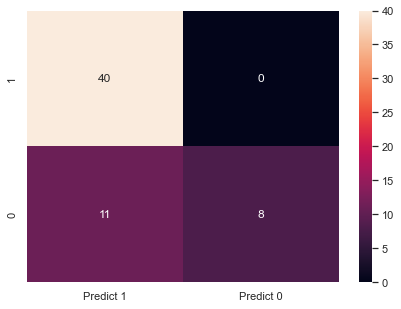

In [25]:
print("Confusion Matrix - Logistic Regression")
cm=metrics.confusion_matrix(y_test, y_predict_LR, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

The confusion matrix: Logistic Regression

True Positives (TP): We correctly predicted the count of subjects having Parkinson Disease and they actually had PD: 40

True Negatives (TN): We correctly predicted the count of subjects not having Parkinson Disease and they actually dint have PD: 8

False Positives (FP): We incorrectly predicted the count of subjects have Parkinson Disease but they actually dint have PD: 11

False Negatives (FN): We incorrectly predicted the count of subjects not having Parkinson Disease but they actually had PD: 0

In [26]:
print("Classification Report - Logistic Regression")
print(metrics.classification_report(y_test, y_predict_LR, labels=[1, 0]))

Classification Report - Logistic Regression
              precision    recall  f1-score   support

           1       0.78      1.00      0.88        40
           0       1.00      0.42      0.59        19

    accuracy                           0.81        59
   macro avg       0.89      0.71      0.74        59
weighted avg       0.85      0.81      0.79        59



Performance measures of Logistic Regression:

1.The accuracy of the logistic Regression model is 0.81

2.The recall of the logistic Regression model is 1.00

3.The precision of the logistic Regression model is 0.78

4.The F1 score of the logistic Regression model is 0.88

Observation:

The recall of the logistic Regression model is 1; which means we were able to idetify all the subjects who had the disease.

### Classification Model 2 : KNN 

In [27]:
# Call Nearest Neighbour algorithm and fit the model on train data
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
NNH.fit(X_train, np.ravel(y_train,order='C'))

KNeighborsClassifier(weights='distance')

In [28]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. 
#The majority class will be assigned to the test data point

y_predict_KNN = NNH.predict(X_test)
model_score_KNN = NNH.score(X_test, y_test)

print("Model Accuracy of KNN is: {0:.4f}".format(model_score_KNN))
print()

Model Accuracy of KNN is: 0.8305



#### Confusion Matrix: KNN

Confusion Matrix - KNN


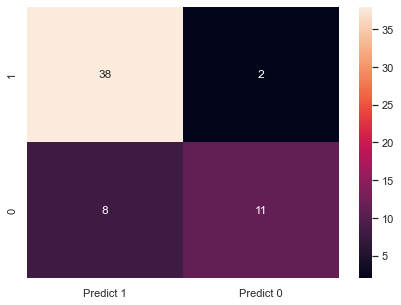

In [29]:
print("Confusion Matrix - KNN")
cm=metrics.confusion_matrix(y_test, y_predict_KNN, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

The confusion matrix: KNN

1.True Positives (TP): We correctly predicted the count of subjects having Parkinson Disease and they actually had PD: 38

2.True Negatives (TN): We correctly predicted the count of subjects not having Parkinson Disease and they actually dint have PD: 11

3.False Positives (FP): We incorrectly predicted the count of subjects have Parkinson Disease but they actually dint have PD: 8

4.False Negatives (FN): We incorrectly predicted the count of subjects not having Parkinson Disease but they actually had PD: 2

In [30]:
print("Classification Report - KNN")
print(metrics.classification_report(y_test, y_predict_KNN, labels=[1, 0]))

Classification Report - KNN
              precision    recall  f1-score   support

           1       0.83      0.95      0.88        40
           0       0.85      0.58      0.69        19

    accuracy                           0.83        59
   macro avg       0.84      0.76      0.79        59
weighted avg       0.83      0.83      0.82        59



Performance measures of KNN:

1.The accuracy of the KNN model is 0.83

2.The recall of the KNN model is 0.95

3.The precision of the KNN model is 0.83

4.The F1 score of the KNN model is 0.88

Observation:

1.The recall of the KNN model is 0.95; which means we were not able to idetify all the subjects who had the disease.

2.When compared to Logistics Regression, while this model had better accuracy; however, KNN is not able to identify all the subjects with the disease.

### Classification Model 3: Naïve Bayes

In [31]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [32]:
y_predict_NB = NB_model.predict(X_test)
model_score_NB=metrics.accuracy_score(y_test, y_predict_NB)

print("Model Accuracy of Naive Bayes is: {0:.4f}".format(model_score_NB))
print()

Model Accuracy of Naive Bayes is: 0.6102



#### Confusion Matrix: Naïve Bayes

Confusion Matrix - Naive Bayes


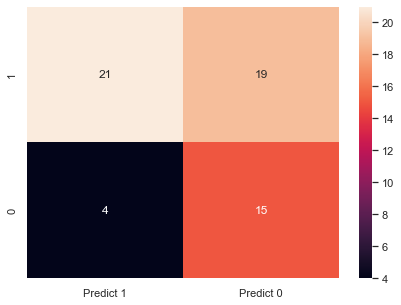

In [33]:
print("Confusion Matrix - Naive Bayes")
cm=metrics.confusion_matrix(y_test, y_predict_NB, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

The confusion matrix: Naive Bayes

1.True Positives (TP): We correctly predicted the count of subjects having Parkinson Disease and they actually had PD: 21

2.True Negatives (TN): We correctly predicted the count of subjects not having Parkinson Disease and they actually dint have PD: 15

3.False Positives (FP): We incorrectly predicted the count of subjects have Parkinson Disease but they actually dint have PD: 4

4.False Negatives (FN): We incorrectly predicted the count of subjects not having Parkinson Disease but they actually had PD: 19

In [34]:
print("Classification Report - Naive Bayes")
print(metrics.classification_report(y_test, y_predict_NB, labels=[1, 0]))

Classification Report - Naive Bayes
              precision    recall  f1-score   support

           1       0.84      0.53      0.65        40
           0       0.44      0.79      0.57        19

    accuracy                           0.61        59
   macro avg       0.64      0.66      0.61        59
weighted avg       0.71      0.61      0.62        59



Performance measures of Naive Bayes:

1.The accuracy of the Naive Bayes model is 0.61

2.The recall of the Naive Bayes model is 0.53

3.The precision of the Naive Bayes model is 0.84

4.The F1 score of the Naive Bayes model is 0.65

Observation:
    
1.Out of the 3 model trained, Naive Bayes model has the worst Recall and it is quite evident that we were not able to idetify all the subjects who had the disease.

2.When compared to Logistics Regression and KNN, this is the worst performing model on all parameters.

### Classification Model 4: SVM

In [35]:
clf = svm.SVC(gamma=0.025, C=3) 
clf.fit(X_train , y_train)

SVC(C=3, gamma=0.025)

In [36]:
y_predict_SVM = clf.predict(X_test)
model_score_NB=metrics.accuracy_score(y_test, y_predict_SVM)

print("Model Accuracy of SVM is: {0:.4f}".format(model_score_NB))
print()

Model Accuracy of SVM is: 0.8136



#### Confusion Matrix: SVM

Confusion Matrix - SVM


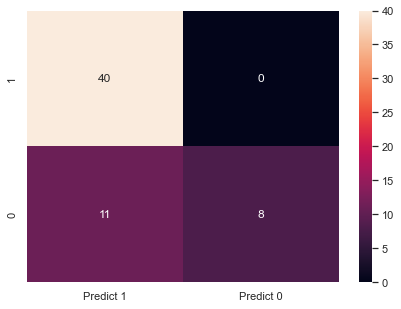

In [37]:
print("Confusion Matrix - SVM")
cm=metrics.confusion_matrix(y_test, y_predict_SVM, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

The confusion matrix: SVM

1.True Positives (TP): We correctly predicted the count of subjects having Parkinson Disease and they actually had PD: 40

2.True Negatives (TN): We correctly predicted the count of subjects not having Parkinson Disease and they actually dint have PD: 8

3.False Positives (FP): We incorrectly predicted the count of subjects have Parkinson Disease but they actually dint have PD: 11

4.False Negatives (FN): We incorrectly predicted the count of subjects not having Parkinson Disease but they actually had PD: 0

In [38]:
print("Classification Report - SVM")
print(metrics.classification_report(y_test, y_predict_SVM, labels=[1, 0]))

Classification Report - SVM
              precision    recall  f1-score   support

           1       0.78      1.00      0.88        40
           0       1.00      0.42      0.59        19

    accuracy                           0.81        59
   macro avg       0.89      0.71      0.74        59
weighted avg       0.85      0.81      0.79        59



Performance measures of SVM:

1.The accuracy of the SVM model is 0.81

2.The recall of the SVM model is 1.00

3.The precision of the SVM model is 0.78

4.The F1 score of the SVM model is 0.88

Observation:

The recall of the SVM model is 1; which means we were able to idetify all the subjects who had the disease.

## Training using  standard Ensemble models :

We will train the following ensemble algorithms:

1.Random Forest

2.XGB Classifer

### Ensemble Model 1: Random Forest

In [39]:
model_rf = RandomForestClassifier(n_estimators = 50,random_state=1,max_features=3) 
model_rf = model_rf.fit(X_train, y_train)

In [40]:
y_predict_rf = model_rf.predict(X_test)
print(model_rf.score(X_test, y_test))

0.864406779661017


#### Confusion Matrix: Random Forest

Confusion Matrix -Random Forest


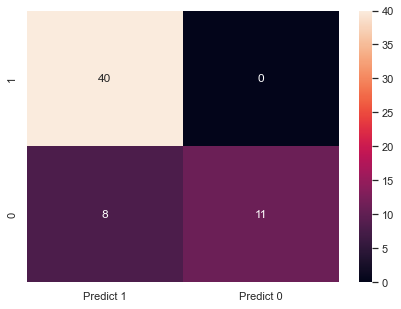

In [41]:
print("Confusion Matrix -Random Forest")
cm=metrics.confusion_matrix(y_test, y_predict_rf, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

The confusion matrix: Random Forest

1.True Positives (TP): We correctly predicted the count of subjects having Parkinson Disease and they actually had PD: 40

2.True Negatives (TN): We correctly predicted the count of subjects not having Parkinson Disease and they actually dint have PD: 11

3.False Positives (FP): We incorrectly predicted the count of subjects have Parkinson Disease but they actually dint have PD: 8

4.False Negatives (FN): We incorrectly predicted the count of subjects not having Parkinson Disease but they actually had PD: 0

In [42]:
print("Classification Report - Random Forest")
print(metrics.classification_report(y_test, y_predict_rf, labels=[1, 0]))

Classification Report - Random Forest
              precision    recall  f1-score   support

           1       0.83      1.00      0.91        40
           0       1.00      0.58      0.73        19

    accuracy                           0.86        59
   macro avg       0.92      0.79      0.82        59
weighted avg       0.89      0.86      0.85        59



Performance measures of Random Forest:

1.The accuracy of the Random Forest model is 0.86

2.The recall of the Random Forest model is 1.00

3.The precision of the Random Forest model is 0.83

4.The F1 score of the Random Forest model is 0.91

Observation:

Random Forest has a recall of 1 which means that we were able to identify all the subjects who had Parkinson Disease.

### Ensemble Model 2: XG Boost

In [60]:
from xgboost import XGBClassifier
model = XGBClassifier(random_state=0, learning_rate=0.1, n_estimators=100, max_depth=4)
model = model.fit(X_train, y_train)
y_predict_XGB = model.predict(X_test)
print('The accuracy of the XGB Classifier is: [%.8f]' % accuracy_score(y_test, y_predict_XGB))

The accuracy of the XGB Classifier is: [0.89830508]


#### Confusion Matrix: XGB Classifier

Confusion Matrix - XGB Classifier


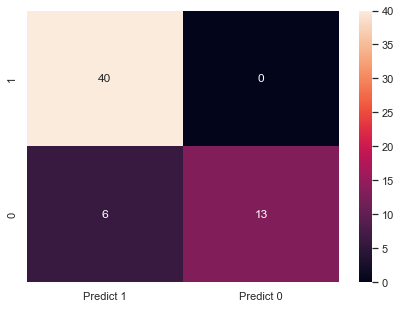

In [61]:
print("Confusion Matrix - XGB Classifier")
cm=metrics.confusion_matrix(y_test, y_predict_XGB, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

The confusion matrix: XG Boost

1.True Positives (TP): We correctly predicted the count of subjects having Parkinson Disease and they actually had PD: 40

2.True Negatives (TN): We correctly predicted the count of subjects not having Parkinson Disease and they actually dint have PD: 13

3.False Positives (FP): We incorrectly predicted the count of subjects have Parkinson Disease but they actually dint have PD: 6

4.False Negatives (FN): We incorrectly predicted the count of subjects not having Parkinson Disease but they actually had PD: 0

In [62]:
print("Classification Report - XGB Classifier")
print(metrics.classification_report(y_test, y_predict_XGB, labels=[1, 0]))

Classification Report - XGB Classifier
              precision    recall  f1-score   support

           1       0.87      1.00      0.93        40
           0       1.00      0.68      0.81        19

    accuracy                           0.90        59
   macro avg       0.93      0.84      0.87        59
weighted avg       0.91      0.90      0.89        59



Performance measures of XG boost:

1.The accuracy of the XG boost model is 0.90

2.The recall of the XG boost model is 1.0

3.The precision of the XG boost model is 0.87

4.The F1 score of the XG boost model is 0.93

Observation:

XG boost has a recall of 1 which means that we were able to identify all the subjects who had Parkinson Disease.

## COMPARE AND PICK THE BEST 

We will consolidate all the models into a table for quick reference and then make our observations
To do the same, we will create summary of all the models and then call them inside a data frame

### 1. Summarise all the models  

In [65]:
# Model1: Logistic Summary

Accuracy_LR=round(metrics.accuracy_score(y_test, y_predict_LR),2)
Recall_LR=round(metrics.recall_score(y_test, y_predict_LR),2)
Precision_LR=round(metrics.precision_score(y_test, y_predict_LR),2)
F1_LR=round(metrics.f1_score(y_test, y_predict_LR),2)

In [66]:
# Model2: KNN Summary

Accuracy_KNN=round(metrics.accuracy_score(y_test, y_predict_KNN),2)
Recall_KNN=round(metrics.recall_score(y_test, y_predict_KNN),2)
Precision_KNN=round(metrics.precision_score(y_test, y_predict_KNN),2)
F1_KNN=round(metrics.f1_score(y_test, y_predict_KNN),2)

In [67]:
# Model3:Native Bayes Summary

Accuracy_NB=round(metrics.accuracy_score(y_test, y_predict_NB),2)
Recall_NB=round(metrics.recall_score(y_test, y_predict_NB),2)
Precision_NB=round(metrics.precision_score(y_test, y_predict_NB),2)
F1_NB=round(metrics.f1_score(y_test, y_predict_NB),2)

In [68]:
# Model4:SVM Summary

Accuracy_SVM=round(metrics.accuracy_score(y_test, y_predict_SVM),2)
Recall_SVM=round(metrics.recall_score(y_test, y_predict_SVM),2)
Precision_SVM=round(metrics.precision_score(y_test, y_predict_SVM),2)
F1_SVM=round(metrics.f1_score(y_test, y_predict_SVM),2)

In [69]:
# Model5: Random Forest Summary

Accuracy_rf=round(metrics.accuracy_score(y_test, y_predict_rf),2)
Recall_rf=round(metrics.recall_score(y_test, y_predict_rf),2)
Precision_rf=round(metrics.precision_score(y_test, y_predict_rf),2)
F1_rf=round(metrics.f1_score(y_test, y_predict_rf),2)

In [70]:
# Model6: XGB Summary

Accuracy_XGB=round(metrics.accuracy_score(y_test, y_predict_XGB),2)
Recall_XGB=round(metrics.recall_score(y_test, y_predict_XGB),2)
Precision_XGB=round(metrics.precision_score(y_test, y_predict_XGB),2)
F1_XGB=round(metrics.f1_score(y_test, y_predict_XGB),2)

### 2. Summarise all the models

In [71]:
summary = {'Accuracy': [Accuracy_LR,Accuracy_KNN,Accuracy_NB,Accuracy_SVM,Accuracy_rf,Accuracy_XGB],
           'Recall': [Recall_LR,Recall_KNN,Recall_NB,Recall_SVM,Recall_rf,Recall_XGB],
           'Precision': [Precision_LR,Precision_KNN,Precision_NB,Precision_SVM,Precision_rf,Precision_XGB],
           'F1Score':[F1_LR,F1_KNN,F1_NB,F1_SVM,F1_rf,F1_XGB]}
models=['Logistic Regression','KNN','Naive Bayes','SVM','Random Forest','XGB']
sum_df = pd.DataFrame(summary,models)

In [72]:
sum_df

,Accuracy,Recall,Precision,F1Score
Logistic Regression,0.81,1.00,0.78,0.88
KNN,0.83,0.95,0.83,0.88
Naive Bayes,0.61,0.52,0.84,0.65
SVM,0.81,1.00,0.78,0.88
Random Forest,0.86,1.00,0.83,0.91
XGB,0.90,1.00,0.87,0.93


Out of the models above (with highest Recall); XG Boost has the highest precison (0.87). XG Boost also has the highest accuracy.
Hence, XG Boost is selected as the best model amongst all the models